In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#converting categorical to numerical values
data_encode = pd.get_dummies(df)

In [6]:
data_encode

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [7]:
#one hot encoding 

In [10]:
print("displaying all the unique value from the column county and gender")
for col in ["country", "gender"]:
    print(f"{col}: {df[col].unique()}")


displaying all the unique value from the column county and gender
country: ['France' 'Spain' 'Germany']
gender: ['Female' 'Male']


In [17]:
categorical_features = ['country','gender','credit_card','active_member']
print ("summry of this features")
for feature in categorical_features:
    print(f"{feature} value counts",df[feature].value_counts())



summry of this features
country value counts France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64
gender value counts Male      5457
Female    4543
Name: gender, dtype: int64
credit_card value counts 1    7055
0    2945
Name: credit_card, dtype: int64
active_member value counts 1    5151
0    4849
Name: active_member, dtype: int64


In [20]:
categorical_features = ['country', 'gender', 'credit_card', 'active_member']

print("Summary of these features:")
for feature in categorical_features:
    print(f"{feature} value counts:\n{df[feature].value_counts()}\n")



Summary of these features:
country value counts:
France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

gender value counts:
Male      5457
Female    4543
Name: gender, dtype: int64

credit_card value counts:
1    7055
0    2945
Name: credit_card, dtype: int64

active_member value counts:
1    5151
0    4849
Name: active_member, dtype: int64



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15156\555210142.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn',data = df , palette= "viridis",)


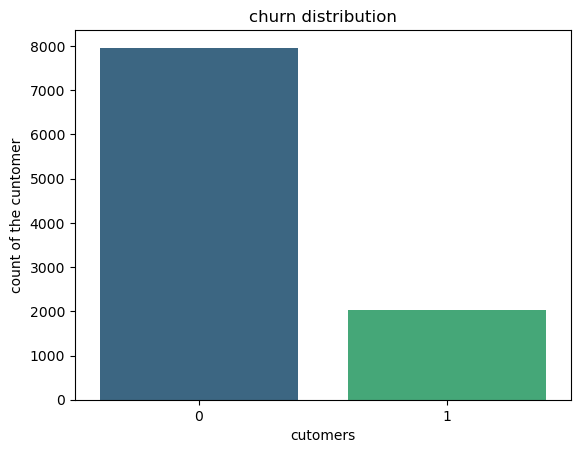

In [22]:
sns.countplot(x='churn',data = df , palette= "viridis",)
plt.title ('churn distribution')
plt.xlabel("cutomers")
plt.ylabel("count of the cuntomer")
plt.show()

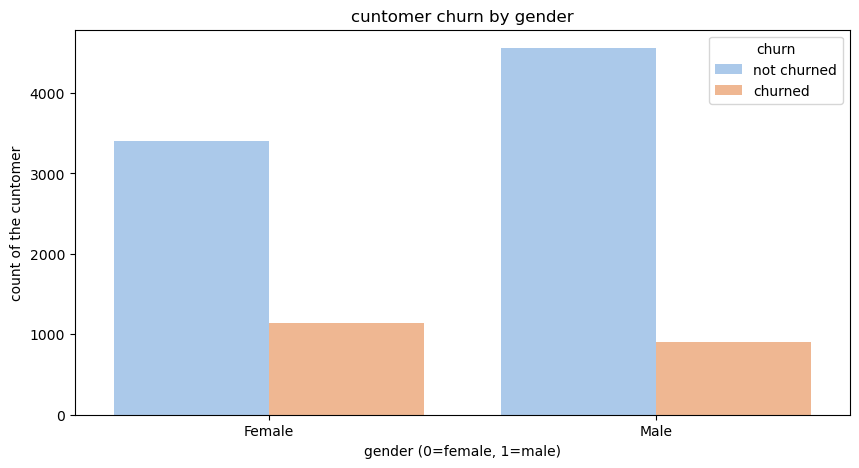

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender',hue='churn',data=df,palette='pastel')
plt.title("cuntomer churn by gender")
plt.xlabel("gender (0=female, 1=male)")
plt.ylabel("count of the cuntomer")
plt.legend (title = "churn",labels = ["not churned","churned"])

In [29]:
#chrn by country 
churn_by_country = df.groupby('country')['churn'].mean()
print ("chrn rate by country",churn_by_country)


chrn rate by country country
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churn, dtype: float64


In [31]:
churn_by_gender = df.groupby('gender')['churn'].mean()
print ("chrn rate by gender",churn_by_gender)


chrn rate by gender gender
Female    0.250715
Male      0.164559
Name: churn, dtype: float64


In [ ]:
churn_by_gactive_member = df.groupby('active_member')['churn'].mean()
print ("chrn rate by gender",churn_by_gender)

chrn rate by gender active_member
0    0.268509
1    0.142691
Name: churn, dtype: float64


In [34]:
churn_by_tenure = df.groupby('tenure')['churn'].mean()
print ("chrn rate by tenure",churn_by_tenure)

chrn rate by tenure tenure
0     0.230024
1     0.224155
2     0.191794
3     0.211100
4     0.205258
5     0.206522
6     0.202689
7     0.172179
8     0.192195
9     0.216463
10    0.206122
Name: churn, dtype: float64


In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



In [36]:
label_encoder = LabelEncoder()

In [38]:
df['country']= label_encoder.fit_transform(df['country'])
df['gender']= label_encoder.fit_transform(df['gender'])

In [42]:
df.drop(columns=['customer_id'],inplace=True)

In [44]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [45]:
#model building 

In [47]:
x = df.drop('churn',axis=1)
y = df['churn']

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=1)

In [51]:
x_test

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9953,550,0,1,47,2,0.00,2,1,1,97057.28
3850,680,0,1,34,3,143292.95,1,1,0,66526.01
4962,531,0,0,42,2,0.00,2,0,1,90537.47
3886,710,0,1,34,8,147833.30,2,0,1,1561.58
5437,543,0,1,30,6,73481.05,1,1,1,176692.65
...,...,...,...,...,...,...,...,...,...,...
452,592,0,1,31,7,110071.10,1,0,0,43921.36
8355,504,0,1,44,4,113522.64,1,1,1,12405.20
6152,508,0,0,64,2,0.00,1,1,1,6076.62
6226,762,0,1,46,6,123571.77,3,0,1,57014.17


In [52]:
y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
452     0
8355    0
6152    0
6226    1
6064    0
Name: churn, Length: 8000, dtype: int64

In [55]:
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [57]:
log_reg = LogisticRegression()

In [59]:
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [60]:
y_pred_log = log_reg.predict(x_test_scaled)

In [66]:
#model evaluation
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6361
           1       0.61      0.16      0.25      1639

    accuracy                           0.81      8000
   macro avg       0.72      0.57      0.57      8000
weighted avg       0.78      0.81      0.76      8000



In [68]:
 #infomation  gain


In [ ]:
#